In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import qmc
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import time
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Monte Carlo Convergence: Pseudo- and Quasi-random numbers

## Preambule: Generation of Randoms for Monte Carlo

To simulate the risk-neutral price paths in derivative valuation through MCS, the Borwnian motions are simulated through generation of standard normal random variables. Most of the Programming languages, including Python, has a pseudo-random number generator by default. This generates an integer between zero and specified value, where each integer occur with equal probability. The standard uniform random generator, by definition, outputs a random number between [0, 1], with all values in the range equally likely.

A pseudo-random number generator is an algorithm for generating a sequence of numbers whose proeprties approximate the properties of sequences of random numbers. As the name suggests, pseudo-random is not totally random because the algorithm and the generated numbers depend on the initial value, which is randomly generated. The initial value is called seed and it is  important for reproducibility and speed generation. 

This jupyter notebook is dedicated to the analysis of different sampling methods, passing first by pseudo-random genertating algrothms, then quasi-rnadom generating algorithms and eventually comparing them using MCS

## I. Pseudo-Random Number generators
### Method I.1: Approximation with 12 uniform samples

A common by approximate way to do this is to generate 12 uniformly distributed random numbers, add them together and substract 6 from the total. The distribution if the combination must have a mean of zero and a variance of 1.

It is a well-suited approximation, however there are some drawbacks:
* Max/Min required values are -6/6, but the simulation of this approximation will give roughly -4.9 /4.4, which means that are too many values generated around the mean value 

Computation Time: 7.343
Mean......... -0.001
STD.......... 1.001
Skewness..... -0.001
Kurtosis..... -0.102
Min/Max.....-4.098/4.321


(array([1.0000e+01, 2.2000e+01, 4.8000e+01, 8.4000e+01, 2.0300e+02,
        3.6600e+02, 6.3500e+02, 1.1270e+03, 1.8660e+03, 2.9370e+03,
        4.4760e+03, 6.6130e+03, 9.4440e+03, 1.3195e+04, 1.7569e+04,
        2.2842e+04, 2.8840e+04, 3.5153e+04, 4.1687e+04, 4.8182e+04,
        5.4476e+04, 5.9679e+04, 6.3085e+04, 6.5666e+04, 6.6331e+04,
        6.4469e+04, 6.2110e+04, 5.7795e+04, 5.2559e+04, 4.6336e+04,
        3.9464e+04, 3.3122e+04, 2.6519e+04, 2.1205e+04, 1.5773e+04,
        1.1883e+04, 8.4790e+03, 5.7740e+03, 3.8580e+03, 2.4810e+03,
        1.5730e+03, 9.1400e+02, 5.5600e+02, 2.9200e+02, 1.7600e+02,
        5.8000e+01, 4.5000e+01, 1.5000e+01, 7.0000e+00, 1.0000e+00]),
 array([-4.09827097, -3.9298855 , -3.76150002, -3.59311455, -3.42472908,
        -3.25634361, -3.08795813, -2.91957266, -2.75118719, -2.58280171,
        -2.41441624, -2.24603077, -2.0776453 , -1.90925982, -1.74087435,
        -1.57248888, -1.40410341, -1.23571793, -1.06733246, -0.89894699,
        -0.73056152, -0.56

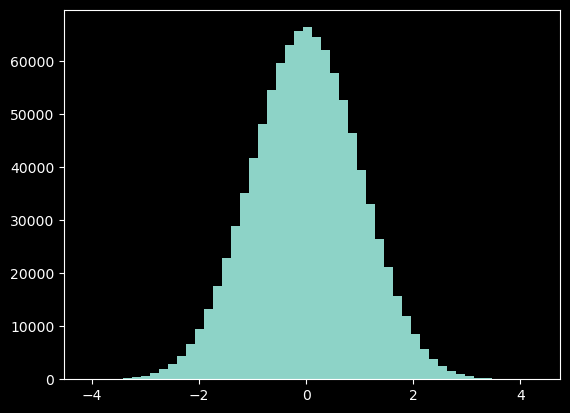

In [2]:
np.random.seed = 1
N = 1e6

def add12Uni(n):
    return np.sum([np.random.uniform(0, 1, 12) for i in range(int(n))], axis=1) - 6

startTime = time.time()
xUni = add12Uni(N)
timeUni = round(time.time() - startTime, 3)

print('Computation Time:', timeUni)
print('Mean.........', round(np.mean(xUni), 3))
print('STD..........', round(np.std(xUni), 3))
print('Skewness.....',  round(stats.skew(xUni), 3))
print('Kurtosis.....', round(stats.kurtosis(xUni), 3))
print(f'Min/Max.....{round(min(xUni), 3)}/{round(max(xUni), 3)}')
plt.hist(xUni, bins=50)

### Method I.2: Box-Muller transformation

Box-Muller transformation is an alternative that is the exact transformation of pairs of standard uniform random numbers to pairs of standard normal random variables. Let $x_1$ and $x_2$ be standard uniformly distributed radnom pairs. The standard normally distributed pairs $z_1$ and $z_2$ may be obtained via:
* $z_1 = \sqrt{-2ln(x_1)cos(2\pi x_2)}$
* $z_2 = \sqrt{-2ln(x_1)sin(2\pi x_2)}$

As demonstrated below, this method takes way less computation time for the same amount of samples (0.05 vs 3.9 for 12Uni) and is more precise (see mean/kurtosis values)

Computation Time: 0.055
Mean......... -0.001
STD.......... 1.0
Skewness..... -0.001
Kurtosis..... -0.009
Min/Max.....-4.464/4.676


(array([6.0000e+00, 1.0000e+01, 2.9000e+01, 5.3000e+01, 9.7000e+01,
        1.8000e+02, 3.1800e+02, 6.3200e+02, 1.0070e+03, 1.7900e+03,
        2.9110e+03, 4.6140e+03, 6.8080e+03, 9.9520e+03, 1.4252e+04,
        1.9460e+04, 2.5732e+04, 3.2928e+04, 4.1008e+04, 4.8173e+04,
        5.6246e+04, 6.3224e+04, 6.7892e+04, 7.2126e+04, 7.2695e+04,
        7.1558e+04, 6.7811e+04, 6.2076e+04, 5.5174e+04, 4.7330e+04,
        3.9448e+04, 3.1728e+04, 2.4532e+04, 1.8269e+04, 1.3497e+04,
        9.2500e+03, 6.4390e+03, 4.3050e+03, 2.6350e+03, 1.6420e+03,
        9.6400e+02, 5.7000e+02, 3.0600e+02, 1.6200e+02, 8.2000e+01,
        4.7000e+01, 1.7000e+01, 8.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-4.46397736, -4.2811801 , -4.09838284, -3.91558557, -3.73278831,
        -3.54999104, -3.36719378, -3.18439651, -3.00159925, -2.81880199,
        -2.63600472, -2.45320746, -2.27041019, -2.08761293, -1.90481566,
        -1.7220184 , -1.53922113, -1.35642387, -1.17362661, -0.99082934,
        -0.80803208, -0.62

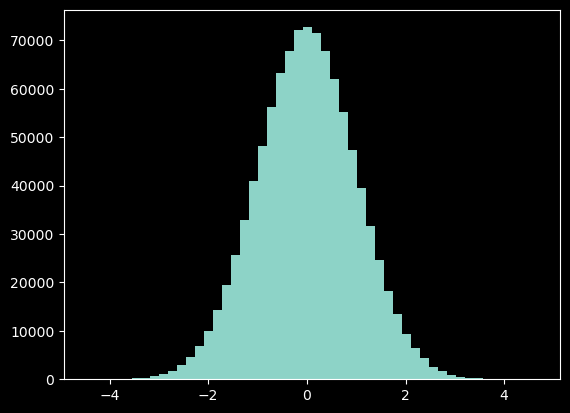

In [3]:
def boxMuller(n):
    n = int(int(n)/2)
    xUni = np.random.uniform(0, 1, (2, n))
    z1 = np.sqrt(-2*np.log(xUni[0]))*np.cos(2*np.pi*xUni[1])
    z2 = np.sqrt(-2*np.log(xUni[0]))*np.sin(2*np.pi*xUni[1])
    return np.concatenate((z1, z2))

startTime = time.time()
xBox = boxMuller(N)
timeUni = round(time.time() - startTime, 3)

print('Computation Time:', timeUni)
print('Mean.........', round(np.mean(xBox), 3))
print('STD..........', round(np.std(xBox), 3))
print('Skewness.....',  round(stats.skew(xBox), 3))
print('Kurtosis.....', round(stats.kurtosis(xBox), 3))
print(f'Min/Max.....{round(min(xBox), 3)}/{round(max(xBox), 3)}')
plt.hist(xBox, bins=50)

### Method I.3: Marsaglia Polar Rejection

This method also requires pairs of uniformly distributed random numbers. To avoid using trigonometric functions like in Box-Muller transformation, there are polar coordinates to be considered. Let $x_1$ and $x_2$ be variables uniformly distributed on [-1, 1] such that $x^2_1 + x^2_2 < 1$. This may be generated as fallows:
* while $\omega \geq 1$, $x_1$ and $x_2$ are standard uniform random numbers such as $\omega = x^2_1 + x^2_2$
* $c = \sqrt{-2\frac{ln(\omega)}{\omega}}$ with $z_1 = c * x_1$ and $z_2 = c * x_2$
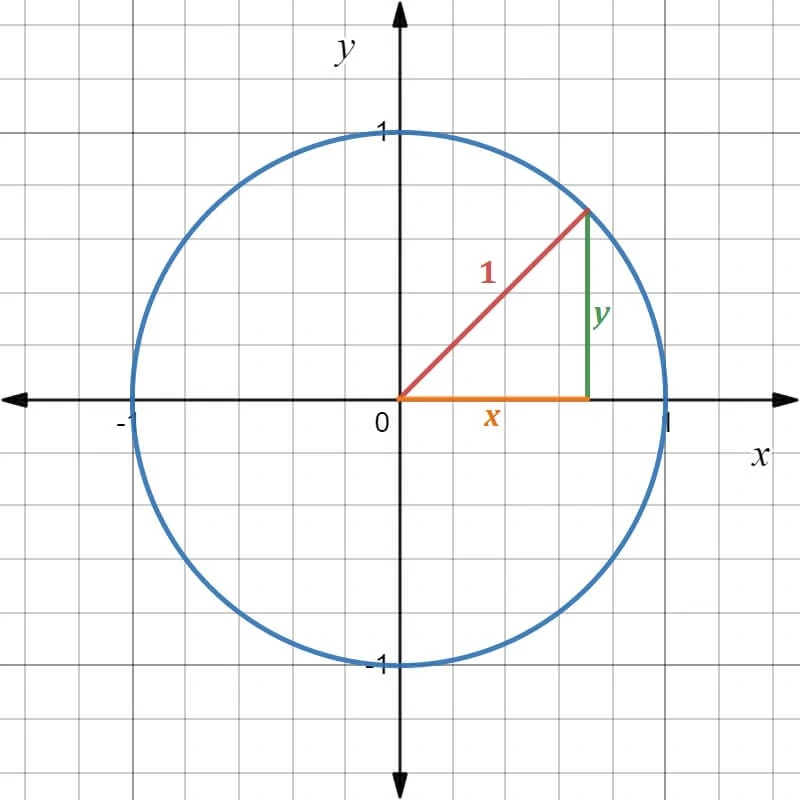

This method takes a little bit more time than the previous method, but still is more performant and accurate

Computation Time: 0.096
Mean......... 0.0
STD.......... 1.0
Skewness..... 0.001
Kurtosis..... -0.001
Min/Max.....-4.651/4.874


(array([1.0000e+00, 6.0000e+00, 7.0000e+00, 2.6000e+01, 4.6000e+01,
        1.2800e+02, 2.4300e+02, 4.2800e+02, 7.6000e+02, 1.3710e+03,
        2.3350e+03, 3.6810e+03, 5.8020e+03, 8.7870e+03, 1.2835e+04,
        1.7942e+04, 2.4309e+04, 3.1953e+04, 4.0706e+04, 4.8726e+04,
        5.7762e+04, 6.5131e+04, 7.0913e+04, 7.4421e+04, 7.5611e+04,
        7.4618e+04, 7.0494e+04, 6.3378e+04, 5.6044e+04, 4.7645e+04,
        3.9196e+04, 3.0577e+04, 2.3210e+04, 1.6927e+04, 1.2104e+04,
        8.1420e+03, 5.4370e+03, 3.4850e+03, 2.0820e+03, 1.2080e+03,
        6.9600e+02, 3.9900e+02, 2.1700e+02, 1.2000e+02, 4.8000e+01,
        2.3000e+01, 9.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([-4.65105384, -4.46054924, -4.27004464, -4.07954003, -3.88903543,
        -3.69853082, -3.50802622, -3.31752161, -3.12701701, -2.93651241,
        -2.7460078 , -2.5555032 , -2.36499859, -2.17449399, -1.98398938,
        -1.79348478, -1.60298018, -1.41247557, -1.22197097, -1.03146636,
        -0.84096176, -0.65

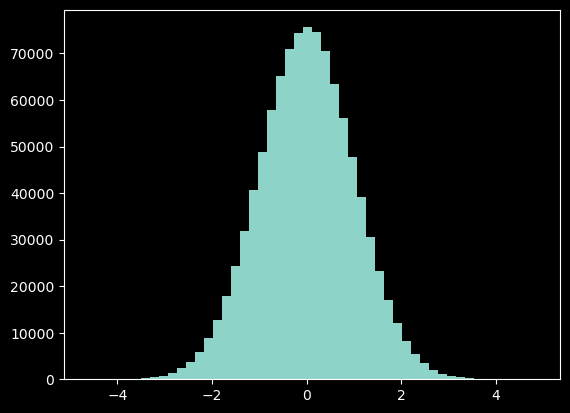

In [4]:
def marsagliaPolarRejection(n):
    n = int(n)//2
    xUni = np.random.uniform(-1, 1, (2,n))
    sumSquared = lambda x: x[0]**2 + x[1]**2
    w = sumSquared(xUni)
    cond = sumSquared(xUni) >= 1
    while np.any(cond):
        xUni[:, cond] = np.random.uniform(-1, 1, np.shape(xUni[:, cond]))
        cond = sumSquared(xUni) >= 1
        
    w = sumSquared(xUni)
    c = np.sqrt(-2*np.log(w)/w)
    return np.concatenate((c*xUni[0], c*xUni[1]))

startTime = time.time()
xMars = marsagliaPolarRejection(N)
timeUni = round(time.time() - startTime, 3)

print('Computation Time:', timeUni)
print('Mean.........', round(np.mean(xMars), 3))
print('STD..........', round(np.std(xMars), 3))
print('Skewness.....',  round(stats.skew(xMars), 3))
print('Kurtosis.....', round(stats.kurtosis(xMars), 3))
print(f'Min/Max.....{round(min(xMars), 3)}/{round(max(xMars), 3)}')
plt.hist(xMars, bins=50)

### Method I.4: Inverse transform sampling

Let U be an random variable which is uniformly distributed on the interval [0, 1]. Let $F$ be a continuous Cumulative Distribution Function of a random variable $X$. 
The inverse CDF is defined by $F^{-1}(u) = inf{x|F(x) \leq u, u \in [0, 1]}$ 

Using that inverse CDF, X may be generated via $X < -F^{-1}(u)$

The cumulative density function of the standard normal distribution is given by $f_X(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$

This leads into a problem. It can be shown that the integral of $e^{-x^2}$ has no closed form using standard elementart functions, meaning that there is no way of finding a closed form of the normal CDF. 

However, there is an approximation of a closed form of inverse CDF using numerical analysis. 

The detailed explanation is written in this StackExchange question: https://stats.stackexchange.com/questions/265925/what-is-inverse-cdf-normal-distribution-formula

Computation Time: 0.063
Mean......... 0.0
STD.......... 1.0
Skewness..... -0.001
Kurtosis..... -0.001
Min/Max.....-4.747/4.815


(array([2.0000e+00, 1.0000e+00, 7.0000e+00, 2.2000e+01, 4.7000e+01,
        8.1000e+01, 1.7400e+02, 3.2900e+02, 5.5600e+02, 1.0830e+03,
        1.7850e+03, 2.9960e+03, 4.8500e+03, 7.3540e+03, 1.1036e+04,
        1.5603e+04, 2.1493e+04, 2.8709e+04, 3.6592e+04, 4.5310e+04,
        5.4140e+04, 6.1991e+04, 6.9387e+04, 7.3813e+04, 7.5939e+04,
        7.5806e+04, 7.2233e+04, 6.7003e+04, 5.9286e+04, 5.0885e+04,
        4.2605e+04, 3.4075e+04, 2.5805e+04, 1.9394e+04, 1.3741e+04,
        9.5930e+03, 6.3200e+03, 4.1440e+03, 2.4790e+03, 1.5230e+03,
        8.2200e+02, 4.6300e+02, 2.8900e+02, 1.1600e+02, 6.7000e+01,
        1.9000e+01, 1.8000e+01, 6.0000e+00, 5.0000e+00, 3.0000e+00]),
 array([-4.7469984 , -4.55575876, -4.36451912, -4.17327948, -3.98203984,
        -3.7908002 , -3.59956056, -3.40832092, -3.21708128, -3.02584164,
        -2.834602  , -2.64336236, -2.45212272, -2.26088308, -2.06964343,
        -1.87840379, -1.68716415, -1.49592451, -1.30468487, -1.11344523,
        -0.92220559, -0.73

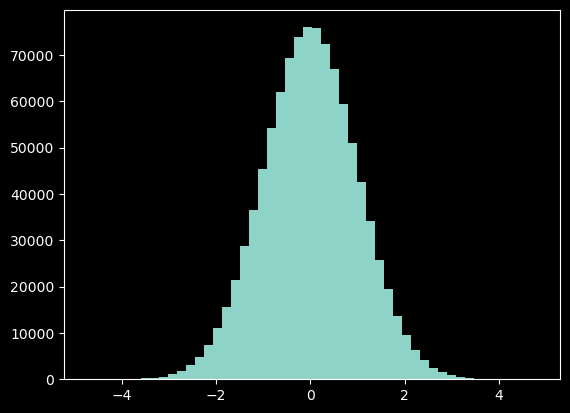

In [5]:
def inverseNorm(n):
    xUni = np.random.uniform(0,1,int(n))
    return stats.norm.ppf(xUni)


startTime = time.time()
xInv = inverseNorm(N)
timeUni = round(time.time() - startTime, 3)

print('Computation Time:', timeUni)
print('Mean.........', round(np.mean(xInv), 3))
print('STD..........', round(np.std(xInv), 3))
print('Skewness.....',  round(stats.skew(xInv), 3))
print('Kurtosis.....', round(stats.kurtosis(xInv), 3))
print(f'Min/Max.....{round(min(xInv), 3)}/{round(max(xInv), 3)}')
plt.hist(xInv, bins=50)

### Method I.5: Ziggurat algortihm

This is the built-in algorithm in python's numpy, which is directly implemented in C, which is the reason why the algorthm executes way quicker than the others written in python (e.g. the algorithms above) 

Computation Time: 0.035
Mean......... -0.002
STD.......... 1.0
Skewness..... -0.004
Kurtosis..... -0.003
Min/Max.....-5.189/4.736


(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 8.0000e+00,
        1.3000e+01, 3.3000e+01, 9.2000e+01, 1.8200e+02, 3.4100e+02,
        6.2700e+02, 1.2090e+03, 2.1400e+03, 3.5030e+03, 5.5840e+03,
        8.5460e+03, 1.3006e+04, 1.8297e+04, 2.5002e+04, 3.3444e+04,
        4.2570e+04, 5.1821e+04, 6.0426e+04, 6.8826e+04, 7.4956e+04,
        7.8459e+04, 7.9211e+04, 7.6160e+04, 7.1073e+04, 6.3528e+04,
        5.4113e+04, 4.4955e+04, 3.5522e+04, 2.7151e+04, 2.0000e+04,
        1.4135e+04, 9.5220e+03, 6.3270e+03, 3.9790e+03, 2.3650e+03,
        1.3480e+03, 7.5600e+02, 3.9500e+02, 1.8100e+02, 1.0100e+02,
        4.2000e+01, 2.6000e+01, 1.3000e+01, 6.0000e+00, 1.0000e+00]),
 array([-5.18860276, -4.99011025, -4.79161774, -4.59312523, -4.39463271,
        -4.1961402 , -3.99764769, -3.79915518, -3.60066267, -3.40217016,
        -3.20367764, -3.00518513, -2.80669262, -2.60820011, -2.4097076 ,
        -2.21121509, -2.01272257, -1.81423006, -1.61573755, -1.41724504,
        -1.21875253, -1.02

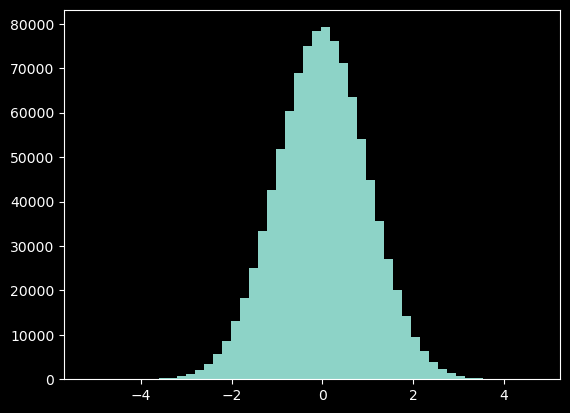

In [6]:
startTime = time.time()
xZig = np.random.normal(0, 1, int(N))
timeUni = round(time.time() - startTime, 3)

print('Computation Time:', timeUni)
print('Mean.........', round(np.mean(xZig), 3))
print('STD..........', round(np.std(xZig), 3))
print('Skewness.....',  round(stats.skew(xZig), 3))
print('Kurtosis.....', round(stats.kurtosis(xZig), 3))
print(f'Min/Max.....{round(min(xZig), 3)}/{round(max(xZig), 3)}')
plt.hist(xZig, bins=50)

### The problem with Pseudo-Random number generators

Since the numbers generated by pseudo-random number generators in Python are considered independent and uniformly distributed, theoretically, every point on the graph is equally likely. However, when plotting these numbers, clusters or gaps are often observed, leading to non-random patterns.

In practice, if a sufficient number of points were sampled, these initial clusters and gaps would eventually be overshadowed by the sheer quantity of points, creating a more even distribution.

Unfortunately, in Monte Carlo simulation, the aim is often to reduce the number of samples to speed up computation time (as is the intent of Variance Reduction Techniques). This is where pseudo-random numbers can introduce bias due to the clustering effect observed. This bias could impact the accuracy of the simulation results and needs to be carefully considered and managed when designing and interpreting simulations.

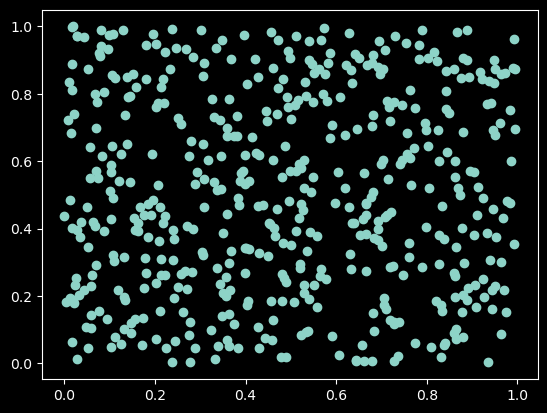

In [7]:
n = 500
x1 = np.random.uniform(0,1,int(n))
x2 = np.random.uniform(0,1,int(n))
plt.scatter(x1,x2)

## II. Quasi-Random Number Generators

In contrast, Quasi-random numbers or low-discrepency sequences are designed to appear random but not clumpy. Quasi-random samples are not independent from the previous one, it ‘remembers’ the previous samples and attempts to position itself away from other samples.

There are many methods to produce Quasi-random number generators, that provides several low discrepancy sequences:

* Faure Sequence
* Haselgrove Sequence
* Halton Sequence
* Sobol Sequence

The last 2 of them are implemented in scipy module, so it is worth to try them and see the differences

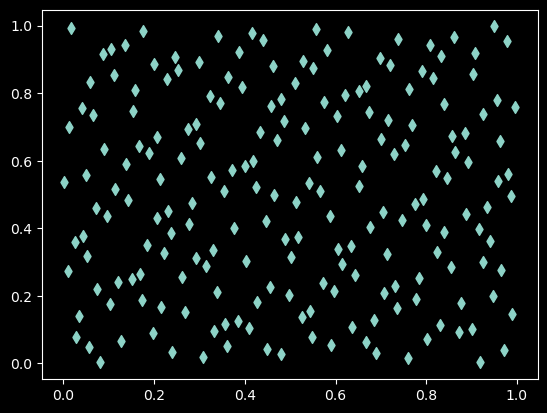

In [8]:
def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)

def haltonNorm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    xHalton = sampler.random(n)
    return stats.norm.ppf(xHalton)
    
x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')

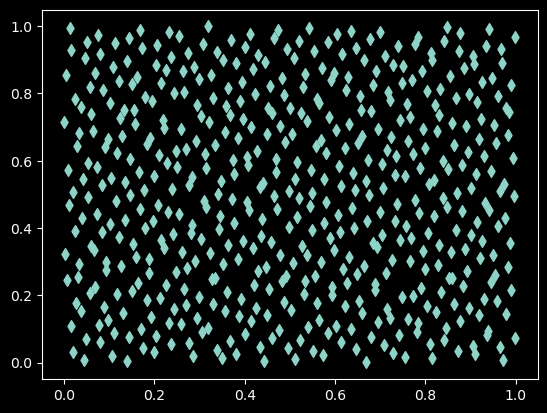

In [9]:
def sobol(m, d=1):
    sampler = qmc.Sobol(d, scramble=True)
    return sampler.random_base2(m)

def sobolNorm(m, d=1):
    sampler = qmc.Sobol(d, scramble=True)
    xSobol = sampler.random_base2(m)
    return stats.norm.ppf(xSobol)

x = sobol(m=9, d=2).T
plt.scatter(x[0],x[1], marker='d')

## III. Comparison

This sub-section is dedicated to the comparison of Pseudo- and Quasi-Random Number Generation  Methods, using a simple European Option valuation. All these methods will be used in MCS to see how much simulations will it take for them to minimize the relative pricing error. The pricing will be done using the Black-Scholes-Merton model.

In [10]:
r = 0.01
S0 = 30
K = 32
T = 252/365
vol = 0.2

def BSM(r, S, K, T, sigma, option="c"):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if option in "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif option in "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Option type must be either 'c' for Call or 'p' for Put")
        
        
bs = BSM(r, S0, K, T, vol, option="c")

print('Black Scholes Price', round(bs, 2))

Black Scholes Price 1.28


Text(0.5, 0, 'Number of Simulations (M)')

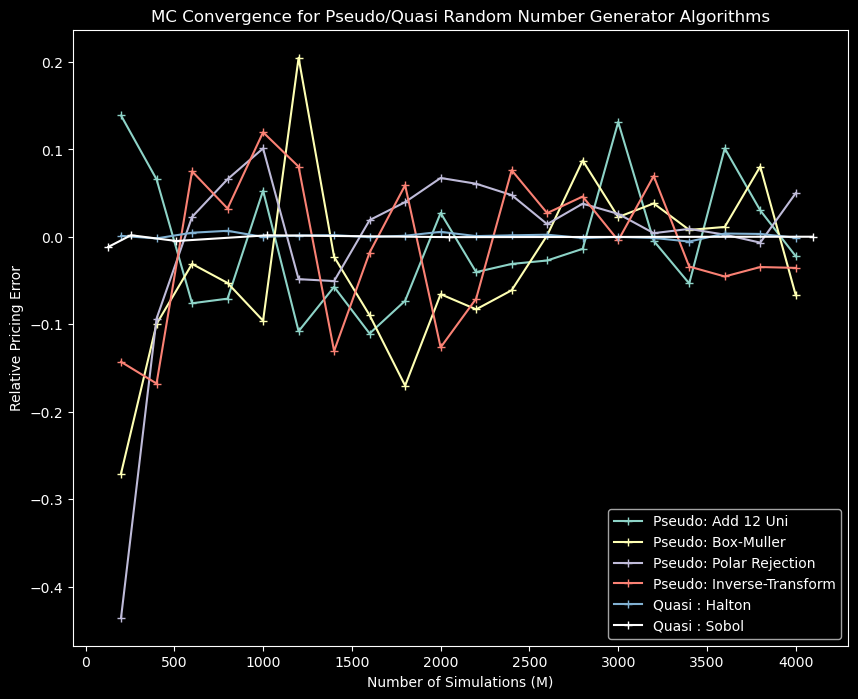

In [11]:
results = {'Pseudo: Add 12 Uni': [],
           'Pseudo: Box-Muller': [],
           'Pseudo: Polar Rejection': [],
           'Pseudo: Inverse-Transform': [],
           'Quasi : Halton': [],
           'Quasi : Sobol': [],}
funcs = {'Pseudo: Add 12 Uni': add12Uni,
         'Pseudo: Box-Muller': boxMuller,
         'Pseudo: Polar Rejection': marsagliaPolarRejection,
         'Pseudo: Inverse-Transform': inverseNorm,
         'Quasi : Halton': haltonNorm,
         'Quasi : Sobol': sobolNorm}

numbers = np.linspace(0,4000,21)[1:]

dt = T
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)

for M in numbers:
    M = int(M)
    for method in results:
        if method == 'Quasi : Sobol':
            continue
        else:
            Z = funcs[method](M) 
        delta_St = nudt + volsdt*Z
        ST = S0*np.exp(delta_St)
        CT = np.maximum(0, ST - K)
        C0 = np.exp(-r*T)*np.sum(CT)/M
        results[method].append(C0 - bs)
        
sobol_rng = np.arange(7,13)

for M in sobol_rng:
    M = int(M)
    
    Z = funcs['Quasi : Sobol'](M)
    delta_St = nudt + volsdt*Z
    ST = S0*np.exp(delta_St)
    CT = np.maximum(0, ST - K)
    C0 = np.exp(-r*T)*np.sum(CT)/(2**M)
    results['Quasi : Sobol'].append(C0 - bs)
    
    
sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
SE = sigma/np.sqrt(M)

plt.figure(figsize=(10, 8))

for method in results:
    if method == 'Quasi : Sobol':
        plt.plot(2**sobol_rng,results[method],label=method,color='w',marker='+')
    else:
        plt.plot(numbers,results[method],label=method,marker='+')

plt.legend()
plt.title('MC Convergence for Pseudo/Quasi Random Number Generator Algorithms')
plt.ylabel('Relative Pricing Error')
plt.xlabel('Number of Simulations (M)')

## Conclusion

The plot above shows the relative pricing error depending the number of MC simulations, and one may observe that quasi-random number generating methods do outperform all the pseudo-random number generating methods. This means that one must use majoritarily the quasi-random number generating methods for the Monte-Carlo simulations. 